In [2]:
import csv
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly as pl


Plotting the Pareto Frontier for Number of CPUs and Latency, considering all the models included in the study

Plotting analysis for GPT2, GPT2Large and GPT2Medium:
1) Latency vs CPUs
2) Throughput vs CPUs

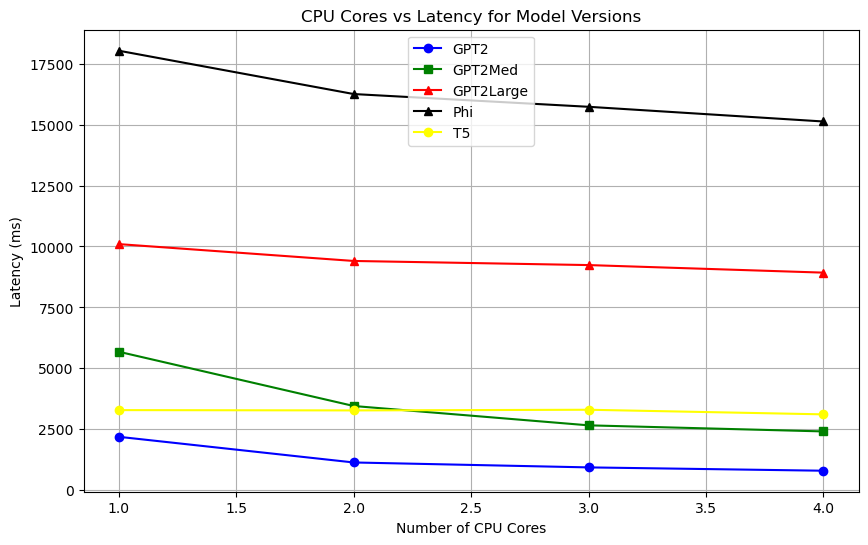

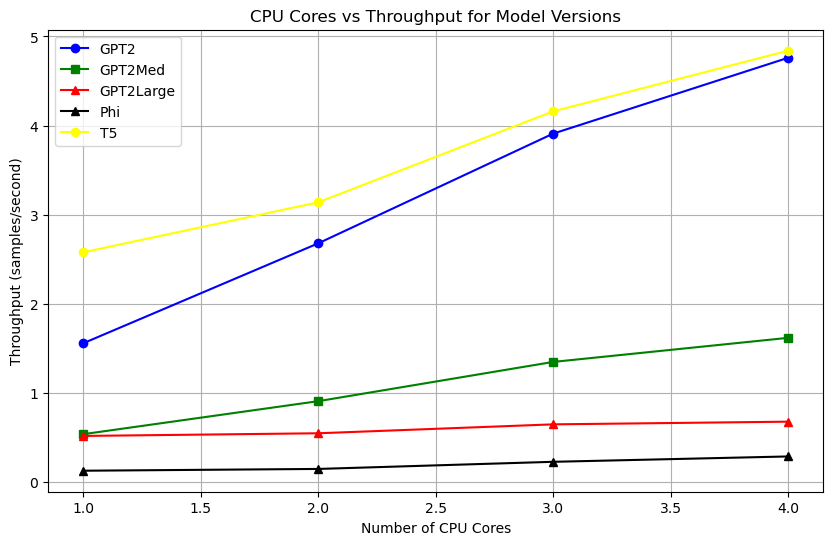

In [3]:
# Data
cpu_cores = np.array([1, 2, 3, 4])

latency_gpt2 = np.array([2192.55, 1140.12, 938.18, 801.56])
latency_gpt2med = np.array([5681.31, 3456.08, 2663.17, 2413.53])
latency_phi = np.array([18030, 16253, 15730, 15127])
latency_gpt2large = np.array([10097, 9406, 9237, 8927])
latency_t5 = np.array([3288.03, 3275.12, 3302.72, 3113.79])

throughput_gpt2 = [1.56, 2.68, 3.91, 4.76]
throughput_gpt2med = [0.54, 0.91, 1.35, 1.62]
throughput_gpt2large = [0.52 , 0.55, 0.65, 0.68]
throughput_phi = [0.13 , 0.15, 0.23, 0.29]
throughput_t5 = [2.58, 3.14, 4.16, 4.84]

# Combine all latencies and CPU cores into a single array for Pareto analysis
latencies = np.concatenate([latency_gpt2, latency_gpt2med, latency_phi, latency_gpt2large, latency_t5])
cores = np.concatenate([cpu_cores] * 4)

#Cores vs Latency
plt.figure(figsize=(10, 6))
plt.plot(cpu_cores, latency_gpt2, label='GPT2', marker='o', color='blue')
plt.plot(cpu_cores, latency_gpt2med, label='GPT2Med', marker='s', color='green')
plt.plot(cpu_cores, latency_gpt2large, label='GPT2Large', marker='^', color='red')
plt.plot(cpu_cores, latency_phi, label='Phi', marker='^', color='black')
plt.plot(cpu_cores, latency_t5, label='T5', marker='o', color='yellow')

plt.xlabel('Number of CPU Cores')
plt.ylabel('Latency (ms)')
plt.title('CPU Cores vs Latency for Model Versions')
plt.legend()
plt.grid(True)
plt.show()

#Plot CPU cores vs Throughput
plt.figure(figsize=(10, 6))
plt.plot(cpu_cores, throughput_gpt2, label='GPT2', marker='o', color='blue')
plt.plot(cpu_cores, throughput_gpt2med, label='GPT2Med', marker='s', color='green')
plt.plot(cpu_cores, throughput_gpt2large, label='GPT2Large', marker='^', color='red')
plt.plot(cpu_cores, throughput_phi, label='Phi', marker='^', color='black')
plt.plot(cpu_cores, throughput_t5, label='T5', marker='o', color='yellow')

plt.xlabel('Number of CPU Cores')
plt.ylabel('Throughput (samples/second)')
plt.title('CPU Cores vs Throughput for Model Versions')
plt.legend()
plt.grid(True)
plt.show()


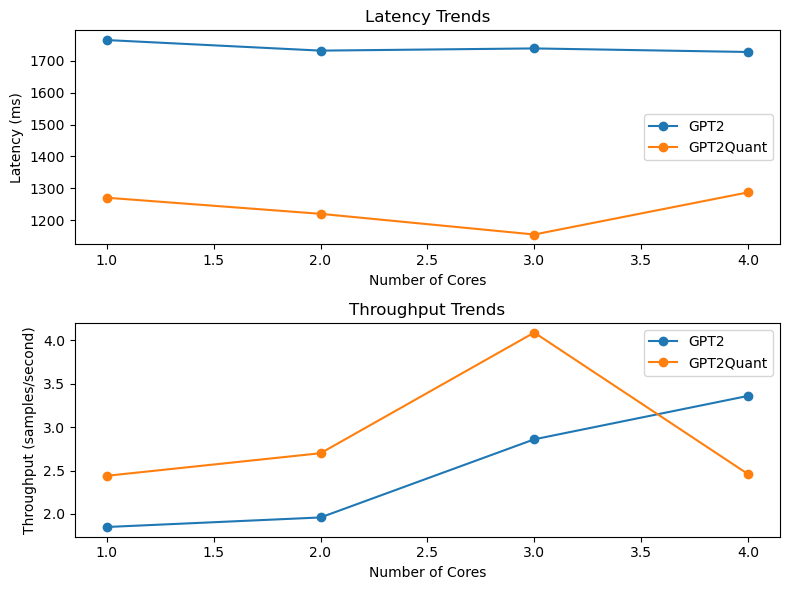

In [4]:

# Data for GPT2
gpt2_cores = np.array([1, 2, 3, 4])
gpt2_latency = np.array([1765.55, 1732.36, 1739.28, 1728.09])
gpt2_throughput = np.array([1.85, 1.96, 2.86, 3.36])

# Data for GPT2Quant
gpt2quant_cores = np.array([1, 2, 3, 4])
gpt2quant_latency = np.array([1270.27 , 1219.7, 1154.74, 1287])
gpt2quant_throughput = np.array([2.44, 2.70, 4.09, 2.46])

fig, axs = plt.subplots(2, figsize=(8, 6))

# Plot latency trends
axs[0].plot(gpt2_cores, gpt2_latency, label='GPT2', marker='o')
axs[0].plot(gpt2quant_cores, gpt2quant_latency, label='GPT2Quant', marker='o')
axs[0].set_title('Latency Trends')
axs[0].set_xlabel('Number of Cores')
axs[0].set_ylabel('Latency (ms)')
axs[0].legend()

# Plot throughput trends
axs[1].plot(gpt2_cores, gpt2_throughput, label='GPT2', marker='o')
axs[1].plot(gpt2quant_cores, gpt2quant_throughput, label='GPT2Quant', marker='o')
axs[1].set_title('Throughput Trends')
axs[1].set_xlabel('Number of Cores')
axs[1].set_ylabel('Throughput (samples/second)')
axs[1].legend()

fig.tight_layout()

plt.show()

Sparsity plots for GPT2


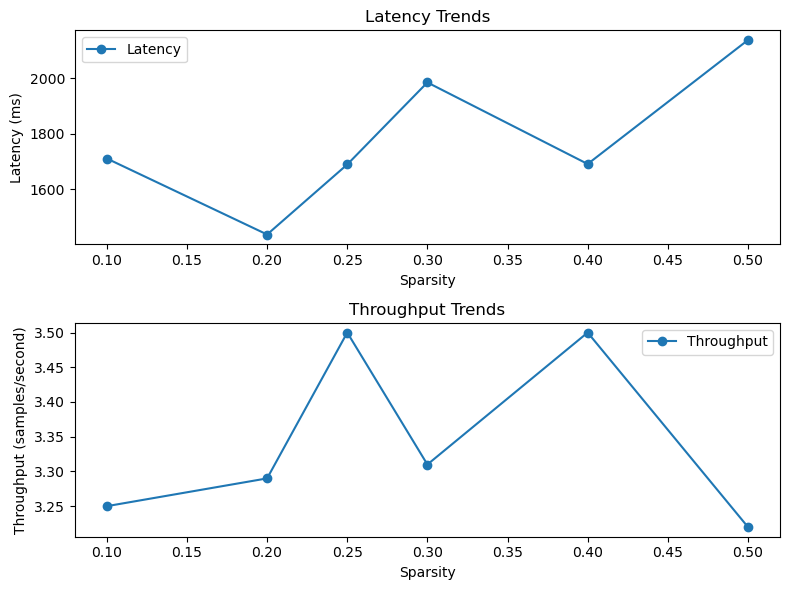

In [5]:

sparsity = np.array([0.1, 0.2, 0.25, 0.3, 0.4, 0.5])
latency = np.array([1710.24, 1436.19, 1688.73, 1984.58, 1690.45, 2137.45])
throughput = np.array([3.25, 3.29, 3.50, 3.31, 3.50, 3.22])
fig, axs = plt.subplots(2, figsize=(8, 6))

axs[0].plot(sparsity, latency, label='Latency', marker='o')
axs[0].set_title('Latency Trends')
axs[0].set_xlabel('Sparsity')
axs[0].set_ylabel('Latency (ms)')
axs[0].legend()

axs[1].plot(sparsity, throughput, label='Throughput', marker='o')
axs[1].set_title('Throughput Trends')
axs[1].set_xlabel('Sparsity')
axs[1].set_ylabel('Throughput (samples/second)')
axs[1].legend()

fig.tight_layout()

plt.show()


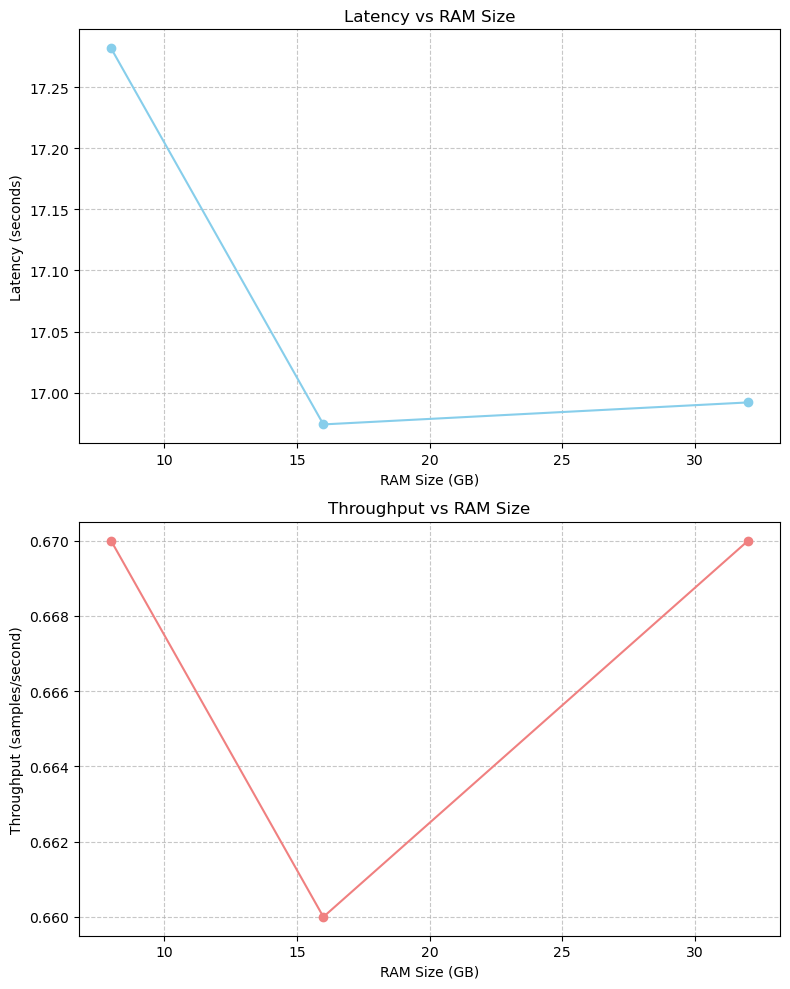

In [6]:

# Data
ram_sizes = [8, 16, 32]  
latency = [17.282, 16.974, 16.992]  
throughput = [0.67, 0.66, 0.67]  

fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Latency visualization
axs[0].plot(ram_sizes, latency, marker='o', linestyle='-', color='skyblue')
axs[0].set_title("Latency vs RAM Size")
axs[0].set_xlabel("RAM Size (GB)")
axs[0].set_ylabel("Latency (seconds)")
axs[0].grid(True, linestyle='--', alpha=0.7)

# Throughput visualization
axs[1].plot(ram_sizes, throughput, marker='o', linestyle='-', color='lightcoral')
axs[1].set_title("Throughput vs RAM Size")
axs[1].set_xlabel("RAM Size (GB)")
axs[1].set_ylabel("Throughput (samples/second)")
axs[1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()